# Pokemon

## Context

Pokémon (ポケモン , Pokemon) és un dels videojocs que Satoshi Tajiri va crear per a diverses plataformes, especialment la Game Boy, i que gràcies a la seva popularitat va aconseguir expandir-se a altres mitjans d'entreteniment, com ara sèries de televisió, jocs de cartes i roba, convertint-se, així, en una marca comercial reconeguda al mercat mundial. Fins al dia 1 de desembre de 2006 havien arribat a 175 milions d'exemplars venuts (inclosa la versió Pikachu de la consola Nintendo 64), arribant a ocupar el segon lloc de les nissagues de videojocs més venudes de Nintendo.

La saga Pokémon fou creada el 27 de febrer de 1996 al Japó. És desenvolupada per la companyia programadora de software japonesa Game Freak, amb els personatges creats per Satoshi Tajiri per a la companyia de joguines Creatures Inc., i alhora distribuïda i/o publicada per Nintendo. La missió dels protagonistes d'aquests jocs és capturar i entrenar els Pokémons, que actualment arriben a 806 tipus diferents. La possibilitat d'intercanviar-los amb altres usuaris va fer que la popularitat dels jocs de Pokémon augmentés i va provocar un èxit en les vendes de jocs de Pokémon, de televisió, de pel·lícules i marxandatges.

![title](img/pokemon.jpg)

## [1] Introducció

En aquesta pràctica es volen analitzar les dades dels *Pokemons* per tal d'extreure informació característica que ens permeti amplicar el coneixement i entendre millor la relació que hi ha entre ells.


Per això s'utilitzaràn dos datasets (obtinguts de la plataforma [Kaggle](https://www.kaggle.com/)) que es complementen i que tenen les dades necessàries per realitzar l'anàlisi que es vol dur a terme.

### Dades

Els *datasets* utilitzats són:
* [Informació dels pokemons](https://www.kaggle.com/rounakbanik/pokemon)
    * ***pokemon.csv:*** Fitxer que conté les dades dels *Pokemons* amb els camps:
        * ***abilities***: Llista d'algunes de habilitats que pot adquirir. (Categòrica)
        * ***against_?***: Debilitat respecte a un tipus concret (against_fire, against_electric, etc). (Numèrica)
        * ***attack***: Punts d'atac. (Numèrica)
        * ***base_egg_steps***: Nombre de passos requerits per a que l'ou del *Pokemon* eclosioni. (Numèrica)
        * ***base_happiness***: Felicitat base. (Numèrica)
        * ***capture_rate***: Probabilitat de captura. (Numèrica)
        * ***classification***: Classificació del *Pokemon* segons la descripció de la *Pokedex* del joc Sol/Luna. (Categòrica)
        * ***defense***: Punts defensa. (Numèrica)
        * ***experience_growth***: Creixement d'experiència. (Numèrica)
        * ***height_m***: Alçada en metres. (Numèrica)
        * ***hp***: Punts de vida. (Numèrica)
        * ***japanese_name***: Nom original Japonès. (Categòrica)
        * ***name***: Nom del *Pokemon*. (Categòrica)
        * ***percentage_male***: Percentatge de mascles. (Numèrica)
        * ***pokedex_number***: Número de l'entrada en la *Pokedex*. (Numèrica)
        * ***sp_attack***: Atac especial. (Numèrica)
        * ***sp_defense***: Defensa especial. (Numèrica)
        * ***speed***: Velocitat. (Numèrica)
        * ***type1***: Tipus primari. (Categòrica)
        * ***type2***: Tipus secundari. (Categòrica)
        * ***weight_kg***: Pes en quilograms. (Numèrica)
        * ***generation***: Primera generació en que va apareixer el *Pokemon*. (Categòrica)
        * ***is_legendary***: Si és o no llegendari. (Categòrica)
    
    
* [Informació de combats](https://www.kaggle.com/terminus7/pokemon-challenge)
    * ***combats.csv:*** Fitxer que conté informació sobre combats hipotètics
        * ***First_pokemon***: Identificador *Pokedex* del primer *Pokemon* del combat.
        * ***Second_pokemon***: Identificador *Pokedex* del segon *Pokemon* del combat.
        * ***Winner***: Identificador *Pokedex* del guanyador.

### Què es vol aconseguir?

Amb aquestes dades es vol donar resposta a la següents preguntes

* Quants *Pokemons* hi ha a cada generació?
* Quants són llegendaris i com es reparteixen entre les diferents generacions?
* Quin dels llegendaris és el més fort i quin el més dèbil?
* Com es distribueixen els tipus?
* Quines combinacions de tipus (*type1* i *type2*) hi ha?
* Com es distribueix el pes i quin és el Pokemon de menor i major pes (en Kg)?
* Com es distribueix l'alçada i quin és el Pokemon de menor i major alçada (en m)?
* Com es distribueix velocitat i quin és el Pokemon de menor i major velocitat?
* Com es distribueix l'atac i defensa i quin és el Pokemon de menor i major atac i defensa?
* Quin és el resultat de la comparació entre l'atac, l'atac especial, la defensa i la defensa especial base?
* Es pot considerar que els Pokemon de tipus roca i foc tenen el mateix pes?

Aquestes preguntes es poden contestar analitzant les dades del dataset *Informació dels Pokemons* (*pokemon.csv*), però es vol anar un pas més enllà i desenvolupar un model predictiu que sigui capaç de preedir quin *Pokemon* guanyaria un combat. Per això s'afegeix el dataset *Informació de combats* (*combats.csv*). 

Amb el model construit, es simularà un torneig amb 16 *Pokemons* i s'intentarà adivinar quin de tots ells seria el guanyador.

---

## [2] Integració i selecció

### Imports

En aquesta pràctica s'utilitzaran les llibreries:

* *pandas*: Per treballar amb *DataFrames* (internament usa *numpy*).
* *matplotlib* i *seaborn*: Per fer els gràfics.
* *missingno*: Per fer gràfics de valors mancants.
* *scipy*: Per fer testos estadístics.
* *scikit-learn*: Per construir els models predictius

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#conda install -c conda-forge missingno
import missingno as msno
import scipy as sp

path_folder = './datasets'

### Carregar les dades
#### Pokemon_info dataset

In [2]:
pokemon_info_df = pd.read_csv(path_folder+'/pokemon.csv')

#Dimensions del DF (files, columnes)
print(pokemon_info_df.shape)

(801, 42)


Hi ha **42 variables** i **801 registres**.

Quins són els diferents tipus de variables?

In [3]:
print(pokemon_info_df.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


Hi ha variables de tipus: 

* ***O***: Categòrica.
* ***float64***: Real.
* ***int64***: Enter.

De quin tipus és cada variable?

In [4]:
#Variables
print(pokemon_info_df.dtypes)

Unnamed: 0             int64
abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack     

Distribució del tipus de les variables.

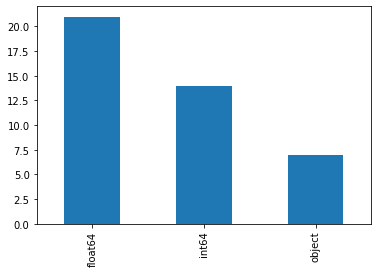

In [5]:
pd.value_counts(pokemon_info_df.dtypes).plot.bar()

**Nota:** Com es pot veure, hi ha moltes variables de tipus ***float64*** i ***int64***, es probable que donat el domini d'aquestes variables, es pogués canviar el tipus a **float32** i **int32** per així reduir la quantitat de memòria utilitzada.

#### Selecció de variables

A partir de les preguntes plantejades en el primer apartat, per aquest *dataset* es seleccionen les variables:

* name
* pokedex_number
* generation
* type1
* type2
* is_legendary
* attack
* sp_attack
* defense
* sp_defense
* speed
* hp
* height_m
* wegiht_kg
* against_?

In [6]:
pokemon_info_df = pokemon_info_df[["name","pokedex_number",\
                 "generation","type1","type2",\
                 "is_legendary","attack","sp_attack",\
                 "defense","sp_defense","speed",\
                 "hp","height_m","weight_kg",\
                 "against_bug","against_dark","against_dragon",\
                 "against_electric", "against_fairy", "against_fight",\
                 "against_fire", "against_flying", "against_ghost",\
                 "against_grass", "against_ground", "against_ice",\
                 "against_normal", "against_poison", "against_psychic",\
                 "against_rock", "against_steel", "against_water"]]

### *pokemon_battles dataset*

In [7]:
pokemon_battles_df = pd.read_csv(path_folder+'/combats.csv')

print(pokemon_battles_df.shape)

(38743, 3)


Hi ha **38,743 registres** i **3 variables.**

De quin tipus són?

In [8]:
print(pokemon_battles_df.dtypes.unique())

[dtype('int64')]


In [9]:
print(pokemon_battles_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object


**Nota:** Totes les variables són enteres (*int64*).

#### Selecció de variables

En aquest *dataset* són necessaries totes les variables, i per tant, no es fa cap selecció.

---

## [3] Neteja de les dades

Un cop es coneixen les variables de les quals es disposa per l'anàlisi i el seu tipus, és important explorar quines d'aquestes variables tenen valors mancants i si això fa que deixin de ser útils.

In [10]:
#Hi ha algún camp en tot el DF que tingui un valor mancant?
print(pokemon_info_df.isnull().values.any())

True


### Valors mancants

Quins camps tenen valors mancants?

In [11]:
pokemon_info_mv_list = pokemon_info_df.columns[pokemon_info_df.isnull().any()].tolist()
print(pokemon_info_mv_list)

['type2', 'height_m', 'weight_kg']


Les variables: **height_m**, **percentage_male**, **type2**, **weight_kg** tenen valors mancants, però quants registres estan afectats?

In [12]:
def missing_values(df, fields):
    n_rows = df.shape[0]
    for field in fields:
        n_missing_values = df[field].isnull().sum()
        print("%s: %d (%.3f)" % (field, n_missing_values, n_missing_values/n_rows))

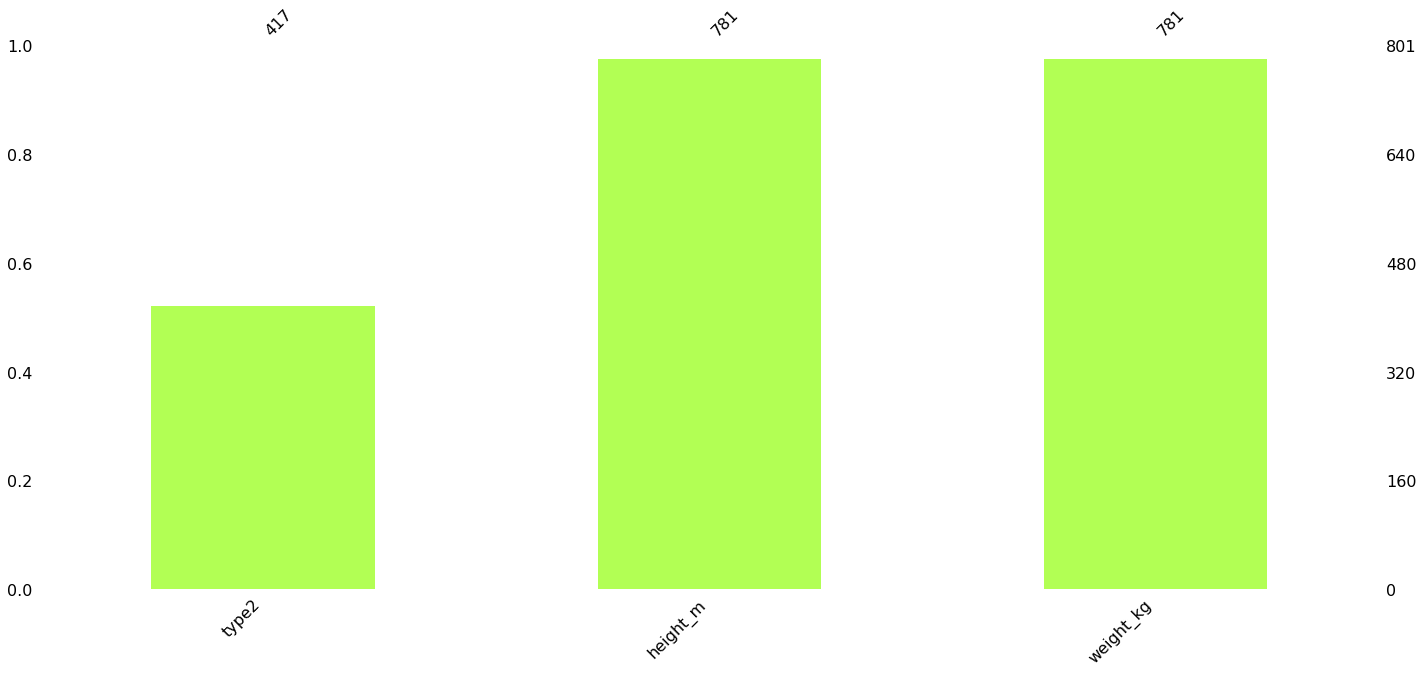

In [13]:
msno.bar(pokemon_info_df[pokemon_info_mv_list], color="#b2ff54", labels=True)

Com es distribueixen els valors mancants en funció de l'ordre del *Pokemon* imputat per la *Pokedex*?

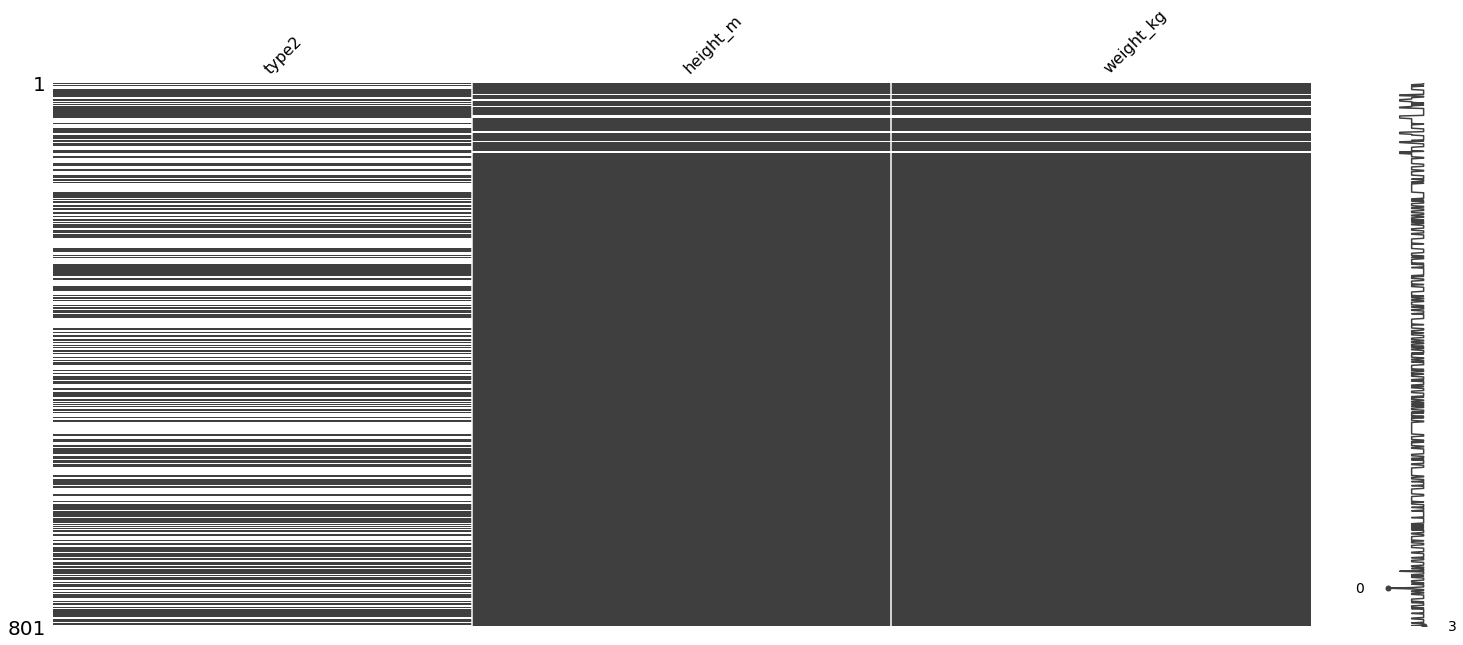

In [14]:
msno.matrix(pokemon_info_df[pokemon_info_mv_list])

La variable **height_m** té 20 registres sense valor (2.5%), **type2** 384 (48%) i **weight_kg** 20 (2.5%)

### Imputar els valors perduts

Per tal d'imputar correctament els valors perduts, cal primer observar els altres valors per cada una d'aquestes variables. Així que anem a veure quins valors diferents hi ha per cada variable.

**type2**

In [15]:
print(pokemon_info_df[pokemon_info_df['type2'].notnull()]['type2'].unique())

['poison' 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fight' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


Com es pot veure, hi ha 18 tipus de Pokemon diferents en la variable **type2**. 

**Com que es tracta d'una variable arbitraria definida pel dissenyador del *Pokemon*, no té cap sentit imputar un valor en base a la similitud que té amb els altres *Pokemons*, i per això, es decideix assignar l'etiqueta arbitrària (*unknown*) per distingir valor mancants.**

In [16]:
pokemon_info_df['type2'].fillna('unknown', inplace=True)

**height_m**

Com que només hi ha un 20 registres sense valor per aquesta variable i el nombre de registres és molt superior a 50, es poden descartar. Per fer-ho assignem el valor 0, i així es remarca que la dada no existeix perquè no té sentit un *Pokemon* que no tingui alçada.

**Nota:** En cas que el nombre de registres fos inferior a 50, es podria implementar una solució basada en crear un **model de regressió lineal simple** on la **variable a preedir** fos l'**alçada** i la **variable predictora** el **pes**. Aquesta predicció es podria fer a agrupant els *Pokemons* pel seu tipus i només per aquells on el factor de correlació de *Pearson* fos superior a 0,7 o inferior a -0,7.

In [17]:
pokemon_info_df['height_m'].fillna(np.int(0), inplace=True)

**weight_kg**

Igual que amb la variable **height_m**


In [18]:
pokemon_info_df['weight_kg'].fillna(np.int(0), inplace=True)

Ara es pot comprovar que no hi ha cap valor *na* en tot el *dataset*

In [19]:
print(pokemon_info_df.columns[pokemon_info_df.isnull().any()].tolist() == [])

True


### Dades extremes

Les dades extremes o *outliers* són aquelles que estàn fora del rang que es pot considerar normal per una variable numèrica. Hi ha diferents maneres de detectar les dades extremes, un dels més comuns és considerar com a tal a totes aquelles dades inferiors a *Q1* - 1.5 * *RIQ* o superior a *Q3* + 1.5 * *RIQ*.

L'anàlisi de dades extremes es farà sobre les variables: *attack*, *sp_attack*, *defense*, *sp_defense*, *speed*, *hp*, *height_m* i *weight_kg*

In [20]:
def print_min_max(var):
    data = pokemon_info_df[var]
    data = sorted(data)
    q1, q2, q3 = np.percentile(data, [25,50,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    data_pd = pokemon_info_df[var]
    outliers = data_pd[(data_pd < lower_bound) | (data_pd > upper_bound)]
    print("{} - mínim: {}, mediana: {}, màxim: {}, number of outliers: {}".format(var, min(pokemon_info_df[var])\
                                                                 ,q2\
                                                                 , max(pokemon_info_df[var])\
                                                                 , len(outliers)))
    
print_min_max("attack")
print_min_max("sp_attack")
print_min_max("defense")
print_min_max("sp_defense")
print_min_max("speed")
print_min_max("hp")
print_min_max("weight_kg")
print_min_max("height_m")

attack - mínim: 5, mediana: 75.0, màxim: 185, number of outliers: 5
sp_attack - mínim: 10, mediana: 65.0, màxim: 194, number of outliers: 10
defense - mínim: 5, mediana: 70.0, màxim: 230, number of outliers: 11
sp_defense - mínim: 20, mediana: 66.0, màxim: 230, number of outliers: 6
speed - mínim: 5, mediana: 65.0, màxim: 180, number of outliers: 6
hp - mínim: 1, mediana: 65.0, màxim: 255, number of outliers: 22
weight_kg - mínim: 0.0, mediana: 25.5, màxim: 999.9, number of outliers: 81
height_m - mínim: 0.0, mediana: 1.0, màxim: 14.5, number of outliers: 27


Una manera de representar aquesta informació és a través de diagrames de caixa o *boxplots*

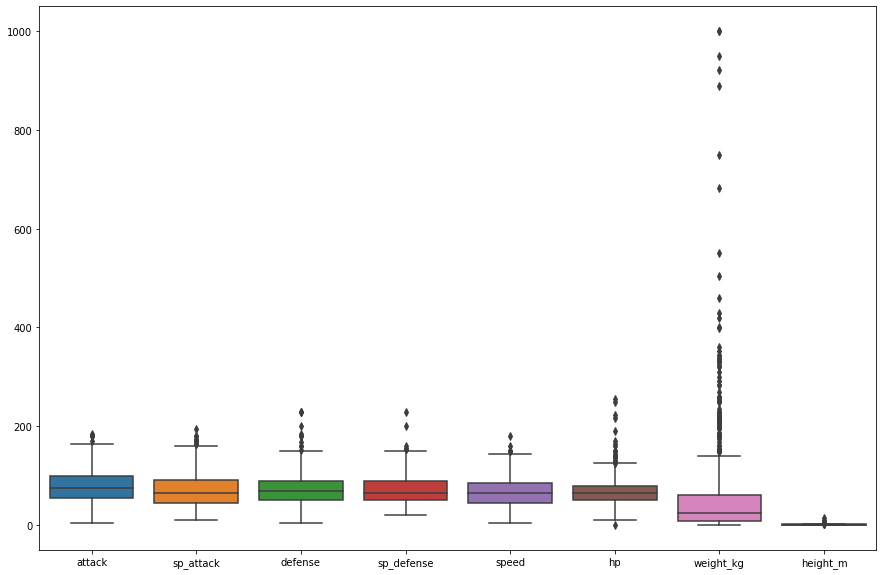

In [21]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=pokemon_info_df[['attack', 'sp_attack', 'defense', 'sp_defense', 'speed', \
                                  'hp', 'weight_kg', 'height_m']], orient='v')

De les variables analitzades, totes tenen relativament poques dades atípiques i les que en tenen no són molt pronunciats a excepció de la variable *weight_kg*, com que aquesta variable no s'usarà en la construcció del model predictiu, s'ha decidit assumir el risc de treballar amb les dades extremes i no eliminar-les del conjunt.

### Guardar les dades preprocessades

Un cop finalitzada l'etapa de integració, filtrat i nateja de dades, es guarda en un fitxer intermig anomenat *pokemon_clean_data.csv*

In [22]:
pokemon_info_df.to_csv(path_folder+'/pokemon_clean_data.csv')

## [4, 5]. Anàlisi descriptiu

### Generacions

Quantes generacions hi ha?

In [23]:
print("Hi ha %d generacions de Pokemons" %(pokemon_info_df["generation"].nunique()))

Hi ha 7 generacions de Pokemons


#### Distribució dels *Pokemons* en base a la generació

Com es distribueixen els Pokemons en base a la primera generació en que van apareixre?

(-1.172795083539883, 1.157629806230198, -1.169802928367887, 1.1536302074244398)

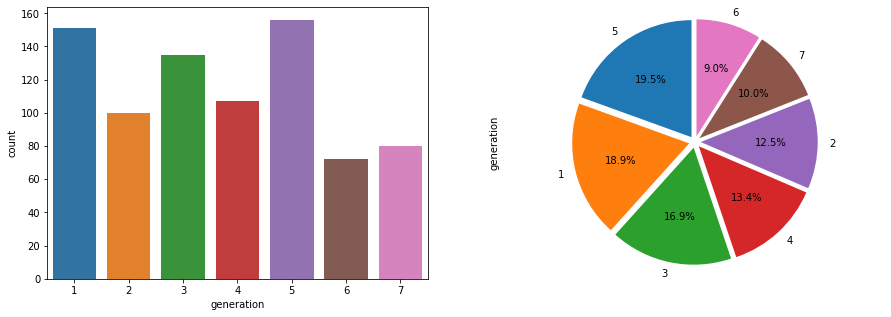

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#Diagrama de barres
sns.countplot(x="generation", data=pokemon_info_df, ax=ax1)

#Diagrama de sectors
sector_diagram = pd.value_counts(pokemon_info_df.generation)
sector_diagram.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, 
                        explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), ax=ax2)
plt.axis("equal")

Quines són les tres generacions on van apareixer més Pokemons?

In [25]:
print("5na generació -> %d Pokemons"%(len(pokemon_info_df[pokemon_info_df["generation"] == 5])))
print("1ra generació -> %d Pokemons"%(len(pokemon_info_df[pokemon_info_df["generation"] == 1])))
print("3era generació -> %d Pokemons"%(len(pokemon_info_df[pokemon_info_df["generation"] == 3])))

5na generació -> 156 Pokemons
1ra generació -> 151 Pokemons
3era generació -> 135 Pokemons


La generació amb més Pokemons és la **5na** amb **156 (19,5%)**, seguidament de la **1era** generació amb **151 (18,9%)** i finalment la **3era** generació amb **135 Pokemons (16,9%)**. Entre aquestes tres generacions hi ha el **55,3%** del total de *Pokemons*.

### Pokemons llegendaris

Hi ha *Pokemons* que despunten per sobre de la resta degut a les seves característiques especials. Sovint estan relacionats amb llegendes del passat i per això se'ls coneix com a llegendàris. Què podem dir al respecte d'aquests *Pokemons*?

#### Quants Pokemons llegendaris hi ha?

In [26]:
print("Nombre total de Pokemons llegendaris: {}".format(len(pokemon_info_df[pokemon_info_df["is_legendary"] == True])))

Nombre total de Pokemons llegendaris: 70


En total hi ha **70 Pokemons llegendaris.**

#### Distribució dels *Pokemons* llegendaris

En quines edicions apareixen aquests Pokemons?

(-1.155822766529171,
 1.1568298393693945,
 -1.1725632198765732,
 1.1545230565022295)

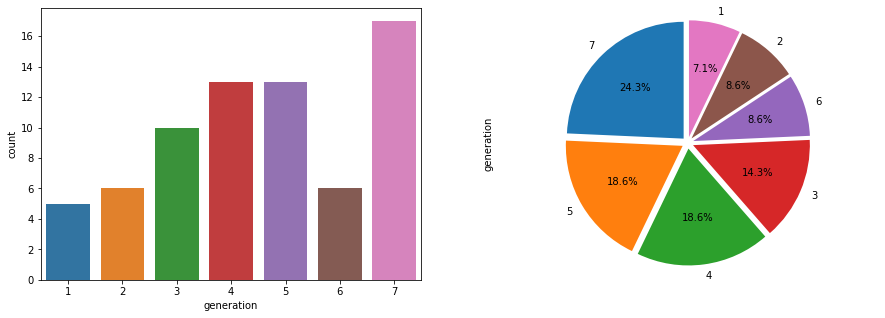

In [27]:
pokemon_legendary_df = pokemon_info_df[pokemon_info_df["is_legendary"] == True]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#Diagrama de barres
sns.countplot(x="generation", data=pokemon_legendary_df, ax=ax1)

#Diagrama de sectors
sector_diagram = pd.value_counts(pokemon_legendary_df.generation)
sector_diagram.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, 
                        explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05), ax=ax2)
plt.axis("equal")

In [28]:
print("7na generació -> %d Pokemons"%(len(pokemon_legendary_df[pokemon_legendary_df["generation"] == 7])))
print("4rta generació -> %d Pokemons"%(len(pokemon_legendary_df[pokemon_legendary_df["generation"] == 4])))
print("5na generació -> %d Pokemons"%(len(pokemon_legendary_df[pokemon_legendary_df["generation"] == 5])))

7na generació -> 17 Pokemons
4rta generació -> 13 Pokemons
5na generació -> 13 Pokemons


La **7na generació** té **17 Pokemons llegendaris (24,3%)**, la **4rta** en té **13 (18,6%)** i la **5na 13**. Entre **aquestes tres generacions** hi ha un **61,5% de Pokemons llegendaris**.

#### Tipus dels *Pokemons* llegendaris

Quin són els tipus (*type1* i *type2*) que predominen en els *Pokemons* llegendaris?

In [29]:
def plot_by_type(dataFrame, title):
    plt.subplots(figsize=(15, 13))

    sns.heatmap(
        dataFrame[dataFrame["type2"] != "unknown"].groupby(["type1", "type2"]).size().unstack(),
        cmap="Blues",
        linewidths=1,
        annot=True
    )

    plt.xticks(rotation=35)
    plt.title(title)
    plt.show()

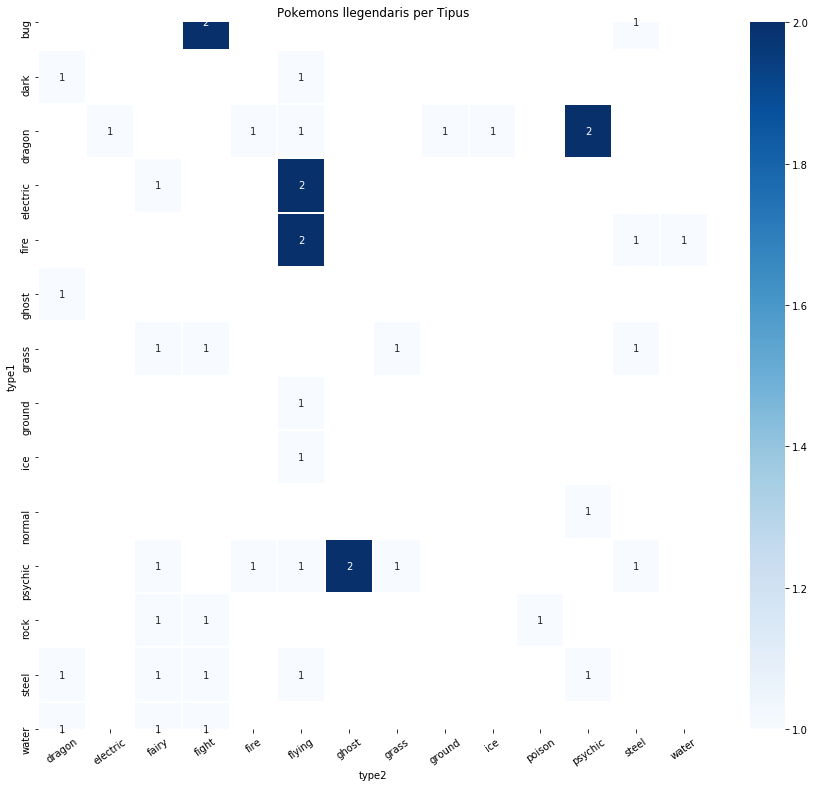

In [30]:
plot_by_type(pokemon_legendary_df, "Pokemons llegendaris per Tipus")

Els tipus **psíquic/fantasma**, **foc/volador**, **elèctric/volador**, **insecte/lluita** i **drac/psíquic** són els tipus amb més *Pokemons* llegendaris, tots ells amb 2 exemplars.

#### *Pokemon* llegendari més fort

Quin és el Pokemon llegendari amb més atac (attack), defensa (defense), vida (hp) i velocitat (velocity) mitjana?

In [31]:
legendary_with_more_attack = max(pokemon_legendary_df['attack'])
legendary_with_less_attack = min(pokemon_legendary_df['attack'])

legendary_with_more_defense = max(pokemon_legendary_df['defense'])
legendary_with_less_defense = min(pokemon_legendary_df['defense'])

legendary_with_more_hp = max(pokemon_legendary_df['hp'])
legendary_with_less_hp = min(pokemon_legendary_df['hp'])

legendary_with_more_speed = max(pokemon_legendary_df['speed'])
legendary_with_less_speed = min(pokemon_legendary_df['speed'])

#Afegim el camp strong amb el comput en base al atac, defensa, vida i velocitat normalitzada.
pokemon_legendary_df["strong"] = ((pokemon_legendary_df['attack'] - legendary_with_less_attack)/(legendary_with_more_attack-legendary_with_less_attack) + 
                                 (pokemon_legendary_df['defense'] - legendary_with_less_defense)/(legendary_with_more_defense-legendary_with_less_defense) +
                                 (pokemon_legendary_df['hp'] - legendary_with_less_hp)/(legendary_with_more_hp-legendary_with_less_hp) +
                                 (pokemon_legendary_df['speed'] - legendary_with_less_speed)/(legendary_with_more_speed-legendary_with_less_speed))

/home/oscar/.conda/envs/uoc/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
print(pokemon_legendary_df["strong"])

143    1.373481
144    1.422513
145    1.447958
149    2.097102
150    1.632615
         ...   
796    1.367552
797    2.184101
798    1.645820
799    1.521065
800    1.332612
Name: strong, Length: 70, dtype: float64


In [33]:
pokemon_legendary_df[pokemon_legendary_df["strong"] == max(pokemon_legendary_df["strong"])][["name", "strong"]]

,name,strong
382,Groudon,2.444031


In [34]:
pokemon_legendary_df[pokemon_legendary_df["strong"] == min(pokemon_legendary_df["strong"])][["name", "strong"]]

,name,strong
788,Cosmog,0.0


En base al càlcul realitzat, podem considerar que el *Pokemon* llegendari més fort és **Groudon** amb una ponderació de: 2,44 punts i el més dèbil és **Cosmog** amb una ponderació de 0 punts.

### *Type1* i *type2*

Cada *Pokemon* és d'un tipus concret **type1** o és una combinació de **type1** i **type2**, per aquest motiu, alguns d'ells no tenen **type2** (com s'ha vist en l'apartat anterior).

### *Pokemons* d'un únic tipus i de doble tipus.

In [35]:
single_type_pokemons = []
dual_type_pokemons = []

for i in pokemon_info_df.index:
    if(pokemon_info_df.type2[i] != "unknown"):
        single_type_pokemons.append(pokemon_info_df.name[i])
    else:
        dual_type_pokemons.append(pokemon_info_df.name[i])
        
print("Nombre de Pokemons amb un únic tipus %d: " % len(single_type_pokemons))
print("Nombre de Pokemons amb dos tipus %d: " % len(dual_type_pokemons))

Nombre de Pokemons amb un únic tipus 417: 
Nombre de Pokemons amb dos tipus 384: 


Hi ha **417** d'un únic tipus (**52,1%**) i **384** amb doble tipus (**47,9%**), això es representa en el següent diagrama de sectors.

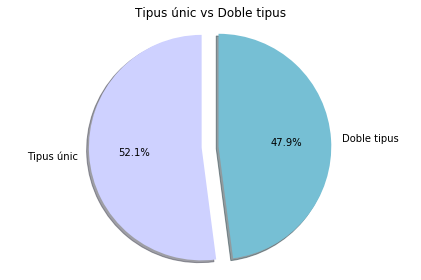

In [36]:
data= [len(single_type_pokemons), len(dual_type_pokemons)]
colors= ["#ced1ff","#76bfd4"]

plt.pie(data, labels=["Tipus únic","Doble tipus"], 
        startangle=90, explode=(0, 0.15), 
        shadow=True, colors=colors, autopct='%1.1f%%')

plt.axis("equal")

plt.title("Tipus únic vs Doble tipus")

plt.tight_layout()

plt.show()

### Distribució en base al tipus

En els següents diagrames de barres es mostra la distribució per **type1** i per **type2**

In [37]:
def plot_distribution(data, col, xlabel, ylabel, title):
    types = pd.value_counts(data[col])

    fig, ax = plt.subplots()
    fig.set_size_inches(15,7)
    sns.set_style("whitegrid")

    ax = sns.barplot(x=types.index, y=types, data=data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, fontsize=12)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_title(title)

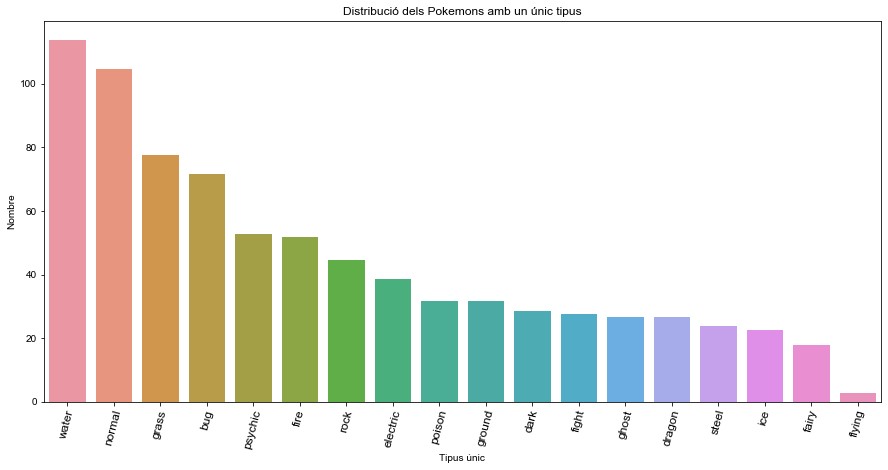

In [38]:
plot_distribution(pokemon_info_df, "type1", "Tipus únic", "Nombre", 
                  "Distribució dels Pokemons amb un únic tipus")

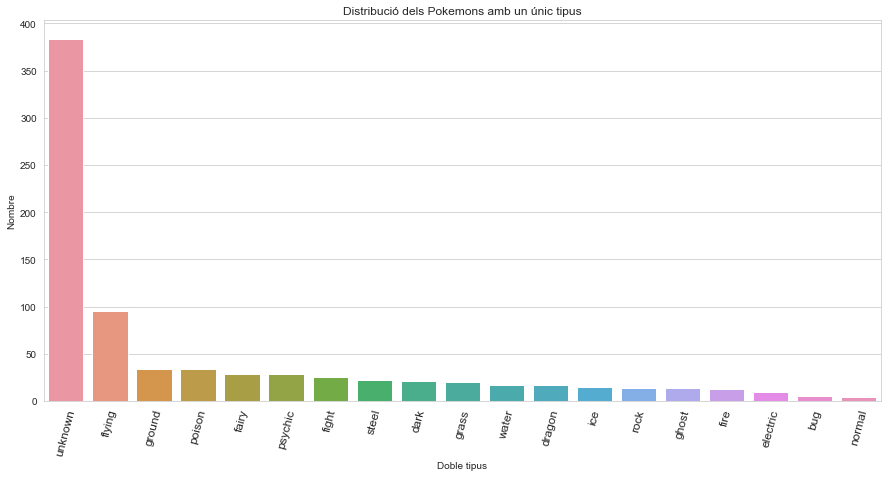

In [39]:
plot_distribution(pokemon_info_df, "type2", "Doble tipus", "Nombre", 
                  "Distribució dels Pokemons amb un únic tipus")

### Combinació de tipus

Ara volem saber quina combinació de tipus **type1** i **type2** hi ha entre tots els Pokemons.

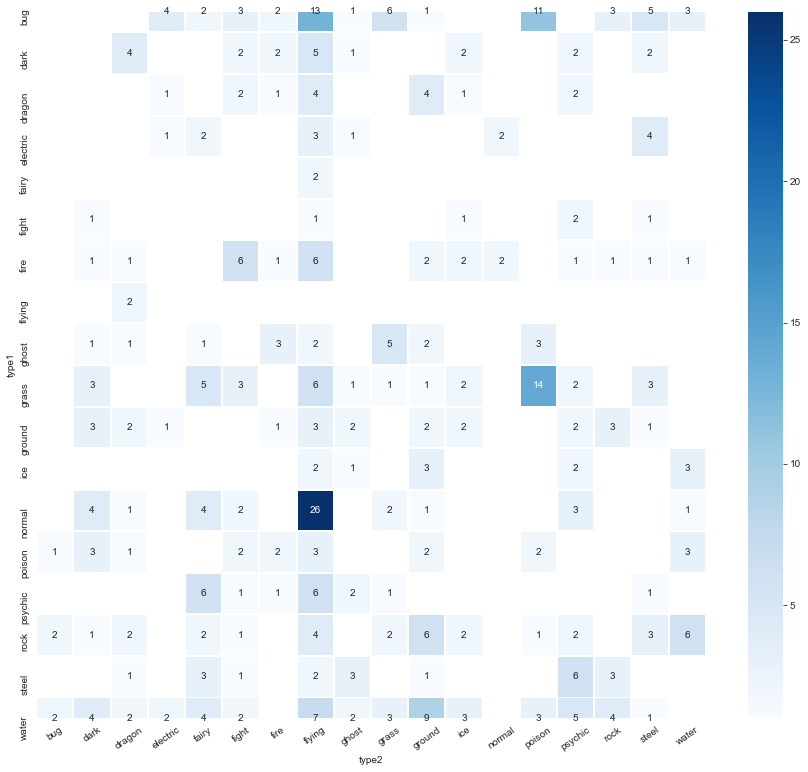

In [40]:
plt.subplots(figsize=(15, 13))

sns.heatmap(
    pokemon_info_df[pokemon_info_df["type2"] != "unknown"].groupby(["type1", "type2"]).size().unstack(),
    cmap="Blues",
    linewidths=1,
    annot=True
)

plt.xticks(rotation=35)
plt.show()

Com es pot veure, la combinació de tipus més comuna és **normal/volador** amb **26 Pokemons** seguida per la combinació **planta/verí** i **insecte/volador** amb **14** i **13 Pokemons** respectivament.

**Nota:** En aquest mapa de calor s'han filtrat tots aquells Pokemons sense segon tipus.

### Pes i alçada

La variable **height_m** conté l'alçada en metres, mentre que la variable **weight_kg** conté el pes en Kilgorams. Així que, quins són els *Pokemons* amb major i menor alçada? I els de major i menor pes?

In [41]:
tallest_m = max(pokemon_info_df['height_m'])
shortest_m = tallest_m
for i in pokemon_info_df.index:
    if pokemon_info_df.height_m[i] > 0 and pokemon_info_df.height_m[i] < shortest_m:
        shortest_m = pokemon_info_df.height_m[i]

tallest_pokemon = pokemon_info_df[pokemon_info_df['height_m'] == tallest_m]
shortest_pokemon = pokemon_info_df[pokemon_info_df['height_m'] == shortest_m]

print("Els Pokemons més alts són:")
for i in tallest_pokemon.index:
    print("\t%s amb %.2f metres" % (tallest_pokemon.name[i], tallest_pokemon.height_m[i]))

print("\nEls Pokemons més petits són:")
for i in shortest_pokemon.index:
    print("\t%s amb %.2f metres" % (shortest_pokemon.name[i], shortest_pokemon.height_m[i]))

Els Pokemons més alts són:
	Wailord amb 14.50 metres

Els Pokemons més petits són:
	Joltik amb 0.10 metres
	Flabébé amb 0.10 metres
	Cutiefly amb 0.10 metres
	Comfey amb 0.10 metres
	Cosmoem amb 0.10 metres


In [42]:
max_weight = max(pokemon_info_df['weight_kg'])
light_kg = max_weight
for i in pokemon_info_df.index:
    if pokemon_info_df.weight_kg[i] > 0 and pokemon_info_df.weight_kg[i] < light_kg:
        light_kg = pokemon_info_df.weight_kg[i]

heviest_pokemon = pokemon_info_df[pokemon_info_df['weight_kg'] == max_weight]
lightest_pokemon = pokemon_info_df[pokemon_info_df['weight_kg'] == light_kg]

print("Els Pokemons amb més pes són:")
for i in heviest_pokemon.index:
    print("\t%s amb %.2f kilograms" % (heviest_pokemon.name[i], heviest_pokemon.weight_kg[i]))

print("\nEls Pokemons amb menys pes són:")
for i in lightest_pokemon.index:
    print("\t%s amb %.2f kilograms" % (lightest_pokemon.name[i], lightest_pokemon.weight_kg[i]))

Els Pokemons amb més pes són:
	Cosmoem amb 999.90 kilograms
	Celesteela amb 999.90 kilograms

Els Pokemons amb menys pes són:
	Gastly amb 0.10 kilograms
	Haunter amb 0.10 kilograms
	Flabébé amb 0.10 kilograms
	Cosmog amb 0.10 kilograms
	Kartana amb 0.10 kilograms


#### Distribució de l'alçada i del pes

Ara es vol veure quina és la distribució de l'alçada i pes dels Pokemons, per això es pot utilitzar histogrames i diagrames de caixa.

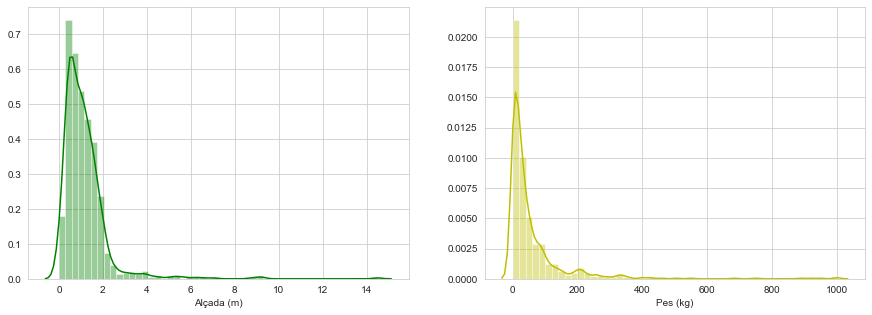

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(pokemon_info_df['height_m'], color='g', axlabel="Alçada (m)", ax=ax1)
sns.distplot(pokemon_info_df['weight_kg'], color='y', axlabel="Pes (kg)", ax=ax2)

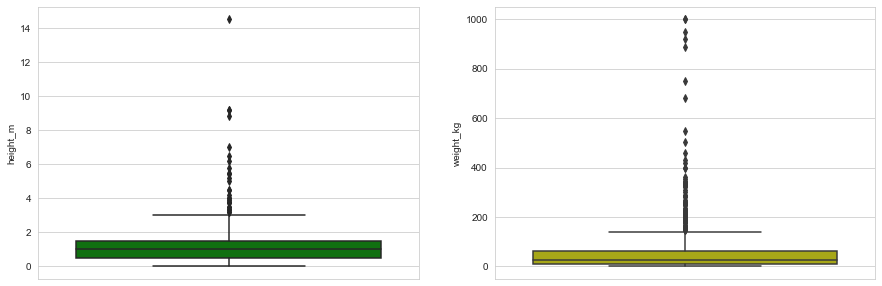

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=pokemon_info_df["height_m"], color="g", orient="v", ax=ax1)
sns.boxplot(x=pokemon_info_df["weight_kg"], color="y", orient="v", ax=ax2)

Tots aquells Pokemons amb una alçada inferior a Com es pot veure, hi ha Pokemons molt dispersos a la resta, es con

### Velocitat

Quins són els *Pokemons* més ràpids i quins els més lents?

In [45]:
fast_value = max(pokemon_info_df['speed'])
slow_value = min(pokemon_info_df[pokemon_info_df['speed'] != 0]['speed'])

fastest_pokemon = pokemon_info_df[pokemon_info_df['speed'] == max(pokemon_info_df['speed'])]
slowest_pokemon = pokemon_info_df[pokemon_info_df['speed'] == slow_value]

print("Els Pokemons més ràpids són:")
for i in fastest_pokemon.index:
    print("\t%s amb una velocitat de %.f punts" %(fastest_pokemon.name[i], fastest_pokemon.speed[i]))

print("Els Pokemons més lents són:")
for i in slowest_pokemon.index:
    print("\t%s amb una velocitat de %.f punts" %(slowest_pokemon.name[i], slowest_pokemon.speed[i]))

Els Pokemons més ràpids són:
	Deoxys amb una velocitat de 180 punts
Els Pokemons més lents són:
	Shuckle amb una velocitat de 5 punts
	Munchlax amb una velocitat de 5 punts
	Pyukumuku amb una velocitat de 5 punts


#### Distribució de la velocitat

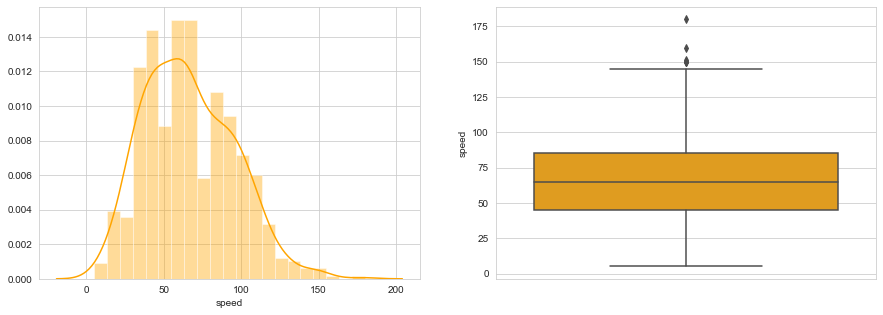

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(pokemon_info_df['speed'], color="orange", ax=ax1)
sns.boxplot(pokemon_info_df['speed'], color="orange", orient="v", ax=ax2)

### Atac i defensa

En els següents gràfics es comparen: l'atac i l'atac especial base, la defensa i la defensa especial base.

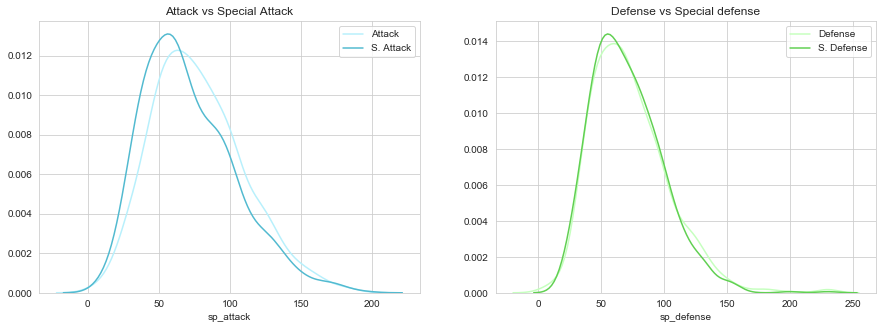

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(pokemon_info_df['attack'], color="#B8F0FC", hist=False, ax=ax1, label="Attack")
sns.distplot(pokemon_info_df["sp_attack"], color="#52BAD0", hist=False, ax=ax1, label="S. Attack")
ax1.title.set_text("Attack vs Special Attack")

ax2.title.set_text("Defense vs Special defense")
sns.distplot(pokemon_info_df['defense'], color="#C6FFBF", hist=False, ax=ax2, label="Defense")
sns.distplot(pokemon_info_df["sp_defense"], color="#61D052", hist=False, ax=ax2, label="S. Defense")

En els següents gràfics es comparen: l'atac i la defensa base, l'atac especial i la defensa especial base.

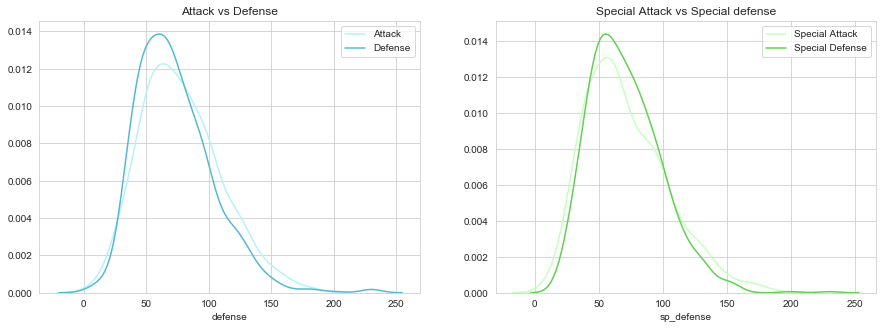

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.title.set_text("Attack vs Defense")
sns.distplot(pokemon_info_df['attack'], color="#B8F0FC", hist=False, ax=ax1, label="Attack")
sns.distplot(pokemon_info_df["defense"], color="#52BAD0", hist=False, ax=ax1, label="Defense")

ax2.title.set_text("Special Attack vs Special defense")
sns.distplot(pokemon_info_df['sp_attack'], color="#C6FFBF", hist=False, ax=ax2, label="Special Attack")
sns.distplot(pokemon_info_df["sp_defense"], color="#61D052", hist=False, ax=ax2, label="Special Defense")

## [4]. Distribució de les variables

En aquest apartat s'estudiarà la distribució que segueixen algunes de les variables i s'aplicaran contrastos de hipòtesi amb la finalitat d'extreure conclusions en base al tipus dels Pokemons.

S'ha decidit estudiar les variables *atac*, *hp*, *defensa* i *velocitat*. 

### Normalitat en la distribució

S'aplica un test de normalitat *shapiro-wilks* per veure si segueixen una [distribució normal](https://en.wikipedia.org/wiki/Normal_distribution). Aquest test planteja el següent contrast de hipòtesis:

$H_{0}: X$ és normal

$H_{1}: X$ no és normal

In [49]:
sp.stats.shapiro(pokemon_info_df['attack'].to_numpy())

(0.9794801473617554, 3.578010998595005e-09)

In [50]:
sp.stats.shapiro(pokemon_info_df['hp'].to_numpy())

(0.892400860786438, 3.323253268086282e-23)

In [51]:
sp.stats.shapiro(pokemon_info_df['defense'].to_numpy())

(0.9398431181907654, 1.7829034379355707e-17)

In [52]:
sp.stats.shapiro(pokemon_info_df['speed'].to_numpy())

(0.9813277721405029, 1.3825084188567871e-08)

In [53]:
sp.stats.shapiro(pokemon_info_df['height_m'].to_numpy())

(0.6370251774787903, 5.111117879034381e-38)

In [54]:
sp.stats.shapiro(pokemon_info_df['weight_kg'].to_numpy())

(0.5102710723876953, 2.9525358643323896e-42)

Els testos per les variables *attack*, *hp*, *defense*, *speed*, *height_m* i *weight_kg* han obtingut un *p-value* inferior al nivell de significació ($\alpha$ = 0.05), i per tant hi ha evidències estadístqiues suficients per rebutjar la hipòtesi nul·la i acceptar que no segueixen una distribució normal.

### Homocedasticitat

**Pes** en els Pokemons de tipus **roca** i **foc**

Ara es vol saber si hi ha diferència en la variancia (heterocedasticitat) o no (homocedasticitat) per la variable *weight_kg* en base a si el seu primer tipus és roca (*rock*) o foc (*fire*). Per això s'aplica un test de **Fligner-Killeen** (s'aplica aquest test perquè no és paramètric i com s'ha vist anteriorment, les dades no han superat el test de normalitat) on el contrast és el següent:

$H_{0}$: La variància entre $X_{0}$ i $X_{1}$ és homogenea.

$H_{1}$: La variància entre $X_{0}$ i $X_{1}$ és heterogenea.

El contrast es fa amb un nivell de significació de:

$\alpha = 0.05$

In [55]:
rock_pokemons_array = pokemon_info_df[(pokemon_info_df['type1'] == 'rock') \
                                      & (pokemon_info_df['weight_kg'] != 0)]['weight_kg'].to_numpy()
fire_pokemons_array = pokemon_info_df[(pokemon_info_df['type1'] == 'fire') \
                                     & (pokemon_info_df['weight_kg'] != 0)]['weight_kg'].to_numpy()
sp.stats.fligner(rock_pokemons_array, fire_pokemons_array)

FlignerResult(statistic=4.034420604827014, pvalue=0.04458098102029232)

Com que s'ha obtingut un ***p-value*** de **0,044** (0,044 < $\alpha$), **hi ha suficients evidències estadístiques per rebutjar la hipótesi nul·la**, i per tant, s'accepta amb un **nivell de confiança del 95%** que **hi ha diferències entre les variancies dels Pokemons de tipus roca i els de tipus foc.**


### Contrast - Pes dels Pokemons de tipus roca i foc

Ara es vol contestar a la pregunta: 

Es pot considerar que els Pokemons de tipus roca i foc tenen la mateixa mitja de pes? Per això es pot aplicar un **t-test** on el contrast d'hipòtesis és:

$H_0:$ $\mu_{1}-\mu_{2} = 0$ (la mitja de **weight_kg** és igual pels Pokemons de tipus roca i foc)

$H_1:$ $\mu_{1}-\mu_{2} \ne 0$ (la mitja de **weight_kg** no és igual pels Pokemons de tipus roca i foc)

On:

$\alpha = 0.05$

**Nota:** Tot i que la variable **weight_kg** no segueix una distribució normal, com que la mida de les dades és considerablement superior a 30, es pot assumir normalitat pel teorema del límit central.

In [56]:
sp.stats.ttest_ind(a = rock_pokemons_array, b = fire_pokemons_array)

Ttest_indResult(statistic=1.4997248629874218, pvalue=0.13722476811641718)

Com que s'ha obtingut un ***p-value*** de **0,137**, **no hi ha evidències estadístiques suficients per rebutjar la hipòtesi nul·la**, i per tant **es pot considerar que la mitja de pes entre els Pokemons de tipus roca i de tipus foc és el mateix.**


## [4, 5] Anàlisi predictiu

En aquest punt **es dona per finalitzat l'anàlisi descriptiu i es passa a l'anàlisi predictiu** amb l'objectiu de crear un model que permeti **adivinar quin guanyaria un combat entre dos *Pokemons***. El problema que es vol resoldre **és un problema de classificació amb dades etiquetades** (model supervisat), i per això, es crearan diversos models simples on es tindrà en compte l'accuracy com a únic paràmetre de bondat del model.

Per mesurar l'*accuracy* s'aplicarà la tècnica de *k-fold cross validation* amb un valor de 10 per la *k*

### Pokemon_battles_df

El *dataset* analitzat fins el moment no conté la informació relacionada als combats, i per això, es complementaran les dades amb el *dataset pokemon_battles_df* amb els següents camps:

* ***First_pokemon***: Índex de la *Pokedex* pel primer contrincant.
* ***Second_pokemon***: Índex de la *Pokedex* pel segon contrincant.
* ***Winner***: Índex de la *Pokedex* del guanyador.

In [57]:
pokemon_battles_df

,First_pokemon,Second_pokemon,Winner
0,1,617,617
1,31,617,617
2,44,617,617
3,72,617,617
4,76,617,76
...,...,...,...
38738,650,283,283
38739,659,283,283
38740,660,283,660
38741,700,283,283


El primer que cal fer es relacionar el *dataset* que conté la informació dels Pokemons (*pokemon_info_df*) amb el *dataset* dels combats (*pokemon_battles_df*). 

Per això apliquem dos *joins*, el primer que relaciona aquests dos datasets per obtenir les dades del primer Pokemon i el segon *join* on es tornen a relacionar aquest dos *datasets*, però aquesta vegada per obtenir la informació del segón *Pokemon* implicat.

In [58]:
pokemon_battles_info_df = pokemon_battles_df.merge(pokemon_info_df, \
                                                      left_on='First_pokemon', \
                                                      right_on='pokedex_number' \
                                                     ).merge(pokemon_info_df, \
                                                             left_on='Second_pokemon', \
                                                             right_on='pokedex_number' \
                                                            )[['First_pokemon', 'Second_pokemon', \
                                                               'Winner', 'name_x', 'attack_x', \
                                                               'sp_attack_x', 'defense_x', 'sp_defense_x', \
                                                               'hp_x', 'speed_x', 'type1_x','is_legendary_x', \
                                                               'name_y', 'attack_y', \
                                                               'sp_attack_y', 'defense_y', 'sp_defense_y', \
                                                               'hp_y', 'speed_y', 'type1_y','is_legendary_y']]

El *dataset* resultant conté per nom *field_x* el resultat del primer join i *field_y* pel resultat del segon join. Apliquem un *rename* perquè els camps *field_x* començin per *First_pokemon* i els camps *field_y* per *Second_pokemon*

In [59]:
pokemon_battles_info_df.rename(columns={'name_x': 'First_pokemon_name', 'attack_x': 'First_pokemon_attack', \
                                        'sp_attack_x': 'First_pokemon_sp_attack', 'defense_x': 'First_pokemon_defense', \
                                        'sp_defense_x': 'First_pokemon_sp_defense', 'hp_x': 'First_pokemon_hp', \
                                        'speed_x': 'First_pokemon_speed', 'type1_x': 'First_pokemon_type1', \
                                        'is_legendary_x': 'First_pokemon_is_legendary', 'name_y': 'Second_pokemon_name', \
                                        'attack_y': 'Second_pokemon_attack', 'sp_attack_y': 'Second_pokemon_sp_attack', \
                                        'defense_y': 'Second_pokemon_defense', 'sp_defense_y': 'Second_pokemon_sp_defense', \
                                        'hp_y': 'Second_pokemon_hp', 'speed_y': 'Second_pokemon_speed', \
                                        'type1_y': 'Second_pokemon_type1', 'is_legendary_y': 'Second_pokemon_is_legendary'}, \
                               inplace=True)

### Camps *diff_?*

Per construir el model predictiu cal calcular els camps amb les diferències entre les propietats implicades. Aquestes s'anomenaran *Diff_?*. Per exemple, la diferència d'atac seria: 

*Diff_attack* = *First_pokemon_attack* - *Second_pokemon_attack*

In [60]:
pokemon_battles_info_df['Diff_attack'] = pokemon_battles_info_df['First_pokemon_attack'] - pokemon_battles_info_df['Second_pokemon_attack']

pokemon_battles_info_df['Diff_sp_attack'] = pokemon_battles_info_df['First_pokemon_sp_attack'] - pokemon_battles_info_df['Second_pokemon_sp_attack']

pokemon_battles_info_df['Diff_defense'] = pokemon_battles_info_df['First_pokemon_defense'] - pokemon_battles_info_df['Second_pokemon_defense']

pokemon_battles_info_df['Diff_sp_defense'] = pokemon_battles_info_df['First_pokemon_sp_defense'] - pokemon_battles_info_df['Second_pokemon_sp_defense']

pokemon_battles_info_df['Diff_hp'] = pokemon_battles_info_df['First_pokemon_hp'] - pokemon_battles_info_df['Second_pokemon_hp']

pokemon_battles_info_df['Diff_speed'] = pokemon_battles_info_df['First_pokemon_speed'] - pokemon_battles_info_df['Second_pokemon_speed']

### Camp *winner_result*
Com que l'objectiu d'aquest model predictiu és fer una classificació on el resultat sigui 0 si guanya el primer *Pokemon* o 1 en cas contrari. Afegim el camp ***Winner_result*** amb aquest càlcul.

In [61]:
pokemon_battles_info_df['Winner_result'] = np.where(\
                                                    pokemon_battles_info_df['First_pokemon'] == \
                                                    pokemon_battles_info_df['Winner'], 0, 1)

### Seleccionar els camps del model

Ara creem el *dataset* ***pokemon_battles_pred_df*** amb els camps que s'usaran com a predictors, que són: 

* ***Diff_attack***
* ***Diff_sp_attack***
* ***Diff_defense***
* ***Diff_sp_defense***
* ***Diff_hp***
* ***Diff_speed***
* ***First_pokemon_is_legendary***
* ***Second_pokemon_is_legendary***

I el *dataset* ***pokemon_battles_res_df*** amb el camp resultat que és *Winner_result*

In [62]:
pokemon_battles_pred = pokemon_battles_info_df[['Diff_attack', 'Diff_sp_attack', \
                                                'Diff_defense', 'Diff_sp_defense', \
                                                'Diff_hp', 'Diff_speed', \
                                                'First_pokemon_is_legendary',
                                                'Second_pokemon_is_legendary']].values

pokemon_battles_res = pokemon_battles_info_df['Winner_result'].values

### Escalar les dades

Si els rangs de valors per les variables utilitzades en el model és considerablment diferent, poden causar distorsions en els resultats obtinguts. Per mostrar la seva distribució es pot utilitzar un *boxplot*.

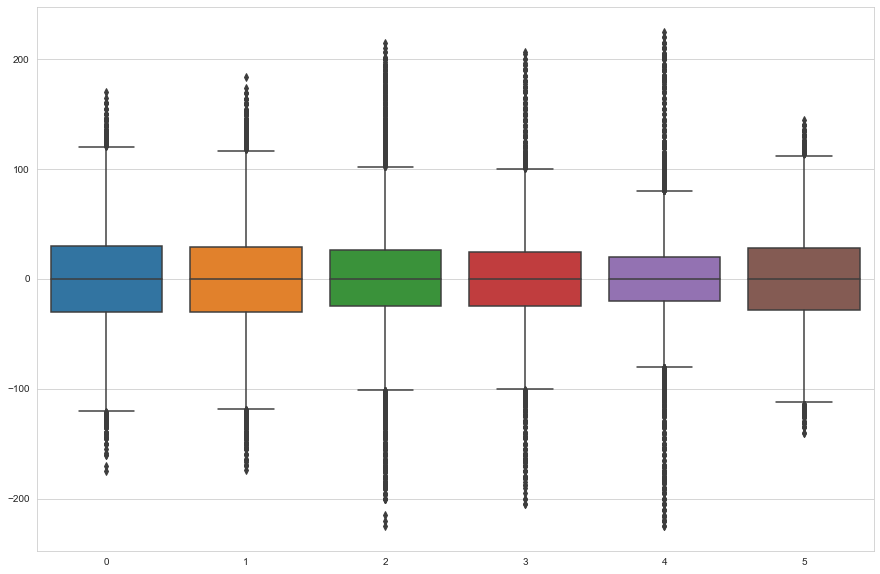

In [63]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=pokemon_battles_pred[:,0:6], orient='v')

Com es pot observar hi ha diferència entre el rang de les dades, per això es pot aplicar un escalat robust.

In [64]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

rs.fit(pokemon_battles_pred)

pokemon_battles_pred = rs.transform(pokemon_battles_pred)

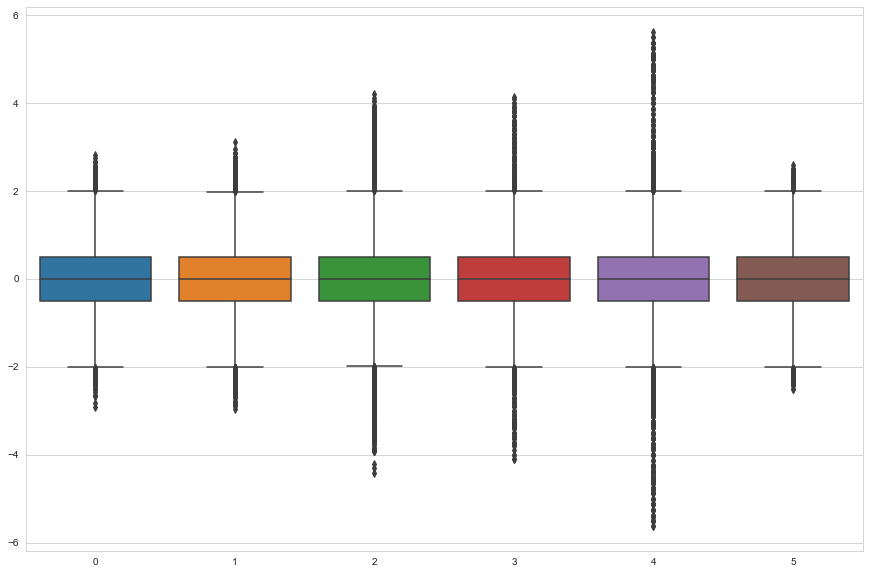

In [65]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=pokemon_battles_pred[:,0:6], orient='v')

### Separar les dades en *dades d'entrenament* i *dades de prova*

Com que és un **model supervisat**, cal separar les dades en dades d'entrenament i dades de prova. El model utilitzarà les dades d'entrenament per aprendre (fase d'entrenament) i les dades de prova per comprovar si el que ha aprés és o no correcte (fase de test).

Com que **hi ha una quantitat relativament alta de registres** (38,743), s'ha decidit utilitzar un **80% de les dades per a l'entrenament** (30,994 registres) i **un 20% pel test** (7,749 registres).

In [66]:
from sklearn.model_selection import train_test_split

#S'ha decidit assignar el valor 23 a la llavor per així obtenir sempre el mateix resultat.
pokemon_battle_pred_train, pokemon_battle_pred_test, \
pokemon_battle_res_train, pokemon_battle_res_test = train_test_split(\
                                                                     pokemon_battles_pred, \
                                                                     pokemon_battles_res, \
                                                                     test_size=0.2, random_state = 23)

### Crear el model de regressió logística

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(pokemon_battle_pred_train, pokemon_battle_res_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
pokemon_battle_results = classifier.predict(pokemon_battle_pred_test)

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pokemon_battle_res_test, pokemon_battle_results)

In [70]:
print(cm)

[[3167  438]
 [ 456 3688]]


In [71]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = pokemon_battles_pred, y = pokemon_battles_res, cv = 10, scoring='accuracy')
print('Mean: {}, standard deviation: {}'.format(accuracies.mean(), accuracies.std()))

Mean: 0.8796945659233601, standard deviation: 0.010370394451956502


**Accuracy:** 87,97%

### K nearest Neighbours (*Knn*)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X=pokemon_battle_pred_train, y=pokemon_battle_res_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
knn_pokemon_battle_results = knn_classifier.predict(pokemon_battle_pred_test)

In [74]:
knn_cm = confusion_matrix(pokemon_battle_res_test, knn_pokemon_battle_results)

In [75]:
print(knn_cm)

[[3182  423]
 [ 458 3686]]


In [76]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn_classifier, X = pokemon_battles_pred, y = pokemon_battles_res, cv = 10, scoring='accuracy')
print('Mean: {}, standard deviation: {}'.format(accuracies.mean(), accuracies.std()))

Mean: 0.8758741252685397, standard deviation: 0.008856867734178363


**Accuracy:** 87,58%

### Support Vector Machine - SVM

In [77]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)

In [78]:
svm_classifier = svm_classifier.fit(X=pokemon_battle_pred_train, y=pokemon_battle_res_train)

In [79]:
svm_pokemon_battle_results = svm_classifier.predict(X=pokemon_battle_pred_test)
svm_cm = confusion_matrix(pokemon_battle_res_test, svm_pokemon_battle_results)

In [80]:
print(svm_cm)

[[3317  288]
 [ 356 3788]]


In [81]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_classifier, X = pokemon_battles_pred, y = pokemon_battles_res, cv = 10, scoring='accuracy')
print('Mean: {}, standard deviation: {}'.format(accuracies.mean(), accuracies.std()))

Mean: 0.9092222359151998, standard deviation: 0.007967037350509649


**Accuracy:** 90,92%

### Classificació per xarxa bayesiana (*Naive bayes*)

In [82]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

In [83]:
nb_classifier = nb_classifier.fit(X=pokemon_battle_pred_train, y=pokemon_battle_res_train)
nb_pokemon_battle_results = nb_classifier.predict(X=pokemon_battle_pred_test)

In [84]:
nb_cm = confusion_matrix(pokemon_battle_res_test, nb_pokemon_battle_results)
print(nb_cm)

[[2946  659]
 [ 817 3327]]


In [85]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb_classifier, X = pokemon_battles_pred, y = pokemon_battles_res, cv = 10, scoring='accuracy')
print('Mean: {}, standard deviation: {}'.format(accuracies.mean(), accuracies.std()))

Mean: 0.7994998584442187, standard deviation: 0.01358469466986609


**Accuracy:** 79,95%

### Random Forest Classifier (RFC)

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc_classifier = rfc_classifier.fit(X=pokemon_battle_pred_train, y=pokemon_battle_res_train)

In [88]:
rfc_pokemon_battle_results = rfc_classifier.predict(X=pokemon_battle_pred_test)
rfc_cm = confusion_matrix(pokemon_battle_res_test, rfc_pokemon_battle_results)

In [89]:
print(rfc_cm)

[[3415  190]
 [ 326 3818]]


In [90]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc_classifier, X = pokemon_battles_pred, y = pokemon_battles_res, cv = 10, scoring='accuracy')
print('Mean: {}, standard deviation: {}'.format(accuracies.mean(), accuracies.std()))

Mean: 0.9251219411461022, standard deviation: 0.007323388880667111


**Accuracy:** 92,25

### Millor model

El model que ha obtingut un millor *accuracy* ha estat el *Random Forest Classifier* amb un encert del 92,51%:

### Millorar el model (afegir el tipus dels *Pokemons*)

Com s'ha mostrat en apartats anteriors, **cada *Pokemon* té un tipus base** i pot tenir un segon tipus. Evidentment, aquestes propietats **influeixen a l'hora de determinar el guanyador en un combat**, per exemple, un Pokemon d'aigua més dèbil (menys atac, defensa, vida, etc.) pot guanyar amb més facilitat a un Pokemon de foc que tingui més elevades les característiques, que a un Pokemon de planta.

Per això, anem a calcular una nova propietat que determini l'eficacia en base al tipus de Pokemon. Aquesta propietat vindrà definida en funció del primer i segon tipus del Pokemon (*type1* i *type2*) i la seva debilitat en vers als altres tipus (*against_?*).

D'aquesta manera, si comparem els Pokemons *Pikachu* (elèctric/elèctric) i *Onix* (roca/terra), té avantatge l'Ònix perquè no té debilitat en vers a l'electricitat (*against_electric = 0*) i en canvi, en Pikachu té debilitat per la roca (*against_rock = 1*) i per la terra (*against_ground = 2*).

Per obtenir un valor numèric, s'aplica la formula:

$f(p1, p2) = g(p1, p2) - g(p2, p1)$

On:

* $g(p1, p2) = dbt1(p1, p2)*ft1 + dbt2(p1, p2)*ft2$
* $dbt1(p1, p2)$ = Debilitat del *Pokemon* p2 en vers al primer tipus del *Pokemon* p1.
* $dbt2(p1, p2)$ = Debilitat del *Pokemon* p2 en vers el segon tipus del *Pokemon* p1.
* $ft1$ = Factor arbitrari per ponderar el tipus 1
* $ft2$ = Factor arbitrari per ponderar el tipus 2

D'aquesta manera, per l'exemple de l'*Onix* vs *Pikachu* donat:

* *Onix*: *type1* = rock, *type2* = ground, *against_electric* = 0
* *Pikachu*: *type1* = eletric, *type2* = eletric, *against_rock* = 1, *against_ground*= 2
* $ft1$ = 1
* $ft2$ = 0.3

tenim:

$f(Onix, Pikachu) = (1*1 + 2*0.3) - (0*1 + 0*0.3) = 1.6$

Com era d'esperar, degut que els *Pokemons* de tipus roca i terra tenen avantatge davant dels *Pokemons* de tipus elèctric, s'ha obtingut un valor positiu.

In [91]:
def effectivity_against(pokemon1, pokemon2, effectivity_type1, effectivity_type2):
    type1 = pokemon1['type1'].iloc[0]
    type2 = pokemon1['type2'].iloc[0]
    against_type1 = pokemon2['against_'+type1].iloc[0]
    if type2 == 'unknown':
        return against_type1 * effectivity_type1
    else:
        against_type2 = pokemon2['against_'+type2].iloc[0]
        return (against_type1 * effectivity_type1) + (against_type2 * effectivity_type2)

In [92]:
def balance_effectivity_against(pokemon1, pokemon2, effectivity_type1 = 1, effectivity_type2 = 0.3):
    return effectivity_against(pokemon1, pokemon2, \
                               effectivity_type1, effectivity_type2) - effectivity_against(pokemon2, pokemon1, \
                               effectivity_type1, effectivity_type2)

In [93]:
def balance_effectivity_against_by_pokedex_number(pokemon_number1, pokemon_number2, \
                                                 effectivity_type1 = 1, effectivity_type2 = 0.3):
    pokemon1 = pokemon_info_df[pokemon_info_df['pokedex_number'] == pokemon_number1]
    pokemon2 = pokemon_info_df[pokemon_info_df['pokedex_number'] == pokemon_number2]
    return balance_effectivity_against(pokemon1, pokemon2, effectivity_type1, effectivity_type2)

Ara cal afegir la propietat *balance_effectivity* al *dataframe pokemon_battles_info_df*

In [94]:
pokemon_battles_info_df['balance_effectivity'] = [\
                                             balance_effectivity_against_by_pokedex_number(\
                                                   row['First_pokemon'], \
                                                   row['Second_pokemon']) \
                                             for index, row in pokemon_battles_df.iterrows()\
                                            ]

S'afegeix la columna *balance_effectivity* al *dataframe pokemon_battles_pred*

In [95]:
pokemon_battles_improved_pred = pokemon_battles_info_df[['Diff_attack', 'Diff_sp_attack', \
                                                            'Diff_defense', 'Diff_sp_defense', \
                                                            'Diff_hp', 'Diff_speed', \
                                                            'First_pokemon_is_legendary',
                                                            'Second_pokemon_is_legendary',
                                                            'balance_effectivity']].values

Distribució de les variables

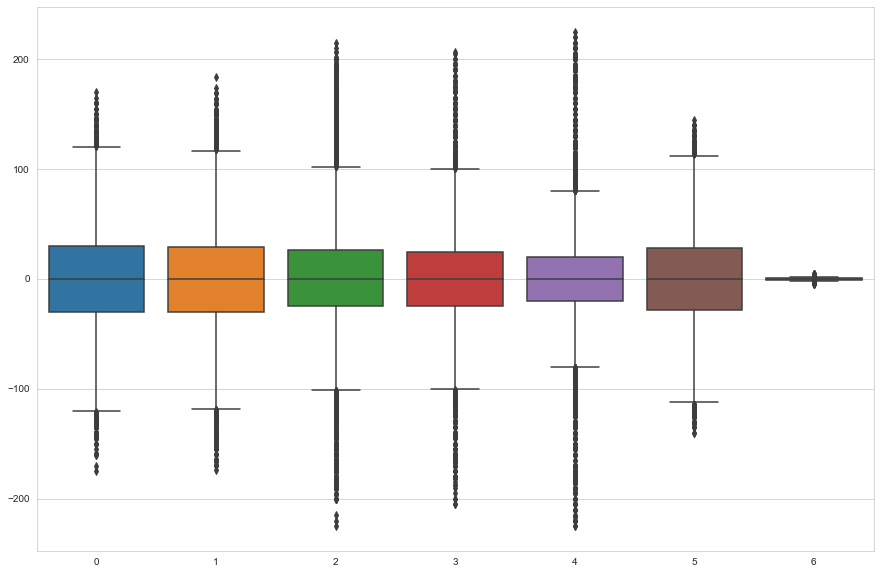

In [96]:
plt.subplots(figsize=(15,10))
sns.boxplot(data=pokemon_battles_improved_pred[:,[0,1,2,3,4,5,8]], orient='v')

Es normalitzen altre vegada les variables numèriques.

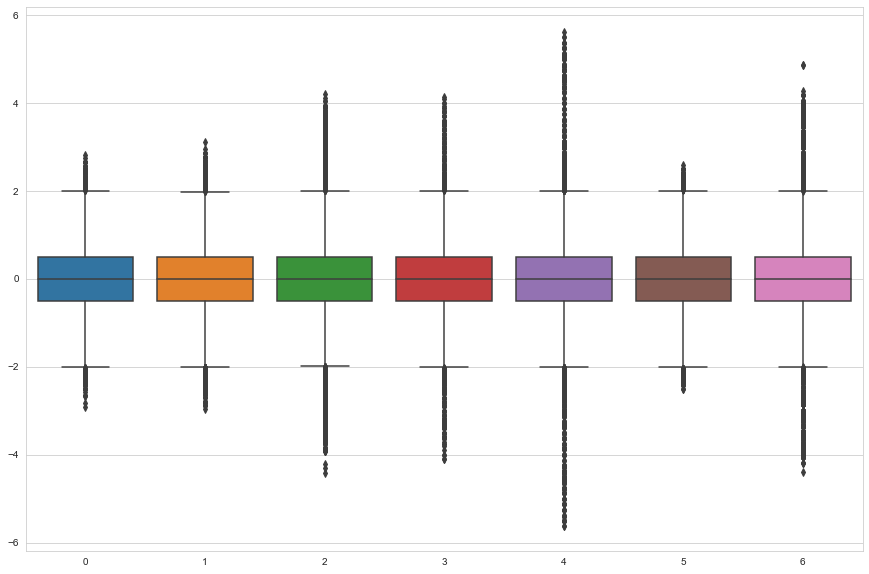

In [97]:
rs = RobustScaler()

rs.fit(pokemon_battles_improved_pred)

pokemon_battles_improved_pred = rs.transform(pokemon_battles_improved_pred)

plt.subplots(figsize=(15,10))
sns.boxplot(data=pokemon_battles_improved_pred[:,[0,1,2,3,4,5,8]], orient='v')

Un cop escalades, tornem a separar-les en un conjunt d'entrenament i un de prova.

In [98]:
pokemon_battles_improved_pred_train, pokemon_battles_improved_pred_test, \
pokemon_battles_improved_res_train, pokemon_battles_improved_res_test = train_test_split(\
                                                                     pokemon_battles_improved_pred, \
                                                                     pokemon_battles_res, \
                                                                     test_size=0.2, random_state = 23)

#### *Random forest* millorat

Calculat l'atribut *balance_effectivity* que té en compte el tipus dels Pokemons involucrats en el combat, tornem a crear el model basat en *random forest* (ja que és amb el que hem obtingut un major *accuracy*) per veure si millorem els resultats.

In [99]:
improved_rfc_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
improved_rfc_classifier = improved_rfc_classifier.fit(\
                                                      X=pokemon_battles_improved_pred_train, \
                                                      y=pokemon_battles_improved_res_train)

In [100]:
improved_rfc_pokemon_battle_results = improved_rfc_classifier.predict(X=pokemon_battles_improved_pred_test)
improved_rfc_cm = confusion_matrix(pokemon_battles_improved_res_test, improved_rfc_pokemon_battle_results)

In [101]:
print(improved_rfc_cm)

[[3405  200]
 [ 332 3812]]


In [102]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = improved_rfc_classifier, X = pokemon_battles_improved_pred, y = pokemon_battles_res, cv = 10, scoring='accuracy')
print('Mean: {}, standard deviation: {}'.format(accuracies.mean(), accuracies.std()))

Mean: 0.9256382700218161, standard deviation: 0.006970821084828071


**Accuracy:** 92,56%

**Nota:** Afegint la variable *balance_effectivity* augmenta la complexitat del model i millora l'accuracy només en un 0,31%.

### [Corba ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

La corba característica pel model obtingut és:

In [103]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true=pokemon_battles_improved_res_test , y_score=improved_rfc_pokemon_battle_results)
auc = auc(fpr, tpr)

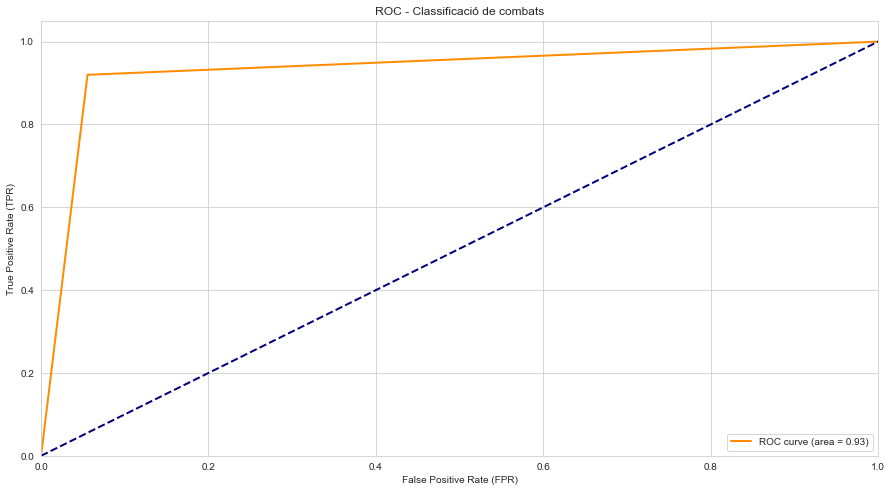

In [104]:
plt.subplots(figsize=(15, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC - Classificació de combats')
plt.legend(loc="lower right")
plt.show()

## Torneig *Pokemon*

Per comprovar l'efectivitat del model de predicció creat s'ha decidit realitzar un Torneig *Pokemon*, on hi participen **16 *Pokemons***, **8** dels quals **són llegendaris**. El Torneig consta de **8 combats** dividits en **4 fases**. 

In [105]:
# Construeix les dades del combat que enfronta el pokemon1 contra el pokemon2, 
#les dades retornades ja estan normalitzades.
def build_fight(name_pokemon1, name_pokemon2):
    pokemon1 = pokemon_info_df[pokemon_info_df['name'] == name_pokemon1].iloc[0]
    pokemon2 = pokemon_info_df[pokemon_info_df['name'] == name_pokemon2].iloc[0]
    return rs.transform(pd.DataFrame.from_dict({'Diff_attack': [pokemon1['attack']-pokemon2['attack']],\
       'Diff_sp_attack': [pokemon1['sp_attack']-pokemon2['sp_attack']],\
       'Diff_defense': [pokemon1['defense']-pokemon2['defense']],\
       'Diff_sp_defense': [pokemon1['sp_defense']-pokemon2['sp_defense']],\
       'Diff_hp': [pokemon1['hp']-pokemon2['hp']],\
       'Diff_speed': [pokemon1['speed']-pokemon2['speed']],\
       'First_pokemon_is_legendary': [pokemon1['is_legendary']],\
       'Second_pokemon_is_legendary': [pokemon2['is_legendary']],\
       'balance_effectivity': [balance_effectivity_against_by_pokedex_number(\
            pokemon1['pokedex_number'], pokemon2['pokedex_number'])]}))

In [106]:
# Realitza una lluita que enfronta el Pokemon1 contra el Pokemon2 i 
# fa la predicció del guanyador amb el classifier
def fight(classifier, name_pokemon1, name_pokemon2):
    pokemon_fight = build_fight(name_pokemon1, name_pokemon2)
        
    #Make the prediction
    result = classifier.predict_proba(X=pokemon_fight)
    
    if result[0][0] > 0.5:
        print('The winner is: {} with a probability of: {}%'.format(name_pokemon1, (result[0][0]*100)))
    else:
        print('The winner is: {} with a probability of: {}%'.format(name_pokemon2, (result[0][1]*100)))

### Round 1

![title](img/torneig/round__1.jpg)

In [107]:
fight1 = fight(classifier=improved_rfc_classifier, name_pokemon1='Snorlax', name_pokemon2='Ninetales')

The winner is: Snorlax with a probability of: 90.0%


In [108]:
fight2 = fight(classifier=improved_rfc_classifier, name_pokemon1='Gengar', name_pokemon2='Altaria')

The winner is: Gengar with a probability of: 90.0%


In [109]:
fight3 = fight(classifier=improved_rfc_classifier, name_pokemon1='Raikou', name_pokemon2='Mew')

The winner is: Raikou with a probability of: 100.0%


In [110]:
fight4 = fight(classifier=improved_rfc_classifier, name_pokemon1='Articuno', name_pokemon2='Kommo-o')

The winner is: Kommo-o with a probability of: 80.0%


In [111]:
fight5 = fight(classifier=improved_rfc_classifier, name_pokemon1='Swampert', name_pokemon2='Solgaleo')

The winner is: Solgaleo with a probability of: 100.0%


In [112]:
fight6 = fight(classifier=improved_rfc_classifier, name_pokemon1='Nidoking', name_pokemon2='Rayquaza')

The winner is: Rayquaza with a probability of: 100.0%


In [113]:
fight7 = fight(classifier=improved_rfc_classifier, name_pokemon1='Mewtwo', name_pokemon2='Celebi')

The winner is: Mewtwo with a probability of: 90.0%


In [114]:
fight8 = fight(classifier=improved_rfc_classifier, name_pokemon1='Arceus', name_pokemon2='Milotic')

The winner is: Arceus with a probability of: 100.0%


### Round 2
![title](img/torneig/round_2.jpg)

In [115]:
fight9 = fight(classifier=improved_rfc_classifier, name_pokemon1='Snorlax', name_pokemon2='Raikou')

The winner is: Raikou with a probability of: 60.0%


In [116]:
fight10 = fight(classifier=improved_rfc_classifier, name_pokemon1='Altaria', name_pokemon2='Kommo-o')

The winner is: Kommo-o with a probability of: 100.0%


In [117]:
fight11 = fight(classifier=improved_rfc_classifier, name_pokemon1='Swampert', name_pokemon2='Mewtwo')

The winner is: Mewtwo with a probability of: 90.0%


In [118]:
fight12 = fight(classifier=improved_rfc_classifier, name_pokemon1='Rayquaza', name_pokemon2='Arceus')

The winner is: Arceus with a probability of: 100.0%


### Round 3
![title](img/torneig/round_3.jpg)

In [119]:
fight9 = fight(classifier=improved_rfc_classifier, name_pokemon1='Snorlax', name_pokemon2='Mewtwo')

The winner is: Mewtwo with a probability of: 90.0%


In [120]:
fight10 = fight(classifier=improved_rfc_classifier, name_pokemon1='Kommo-o', name_pokemon2='Arceus')

The winner is: Arceus with a probability of: 100.0%


### Round 4
![title](img/torneig/round_4.jpg)

In [121]:
fight10 = fight(classifier=improved_rfc_classifier, name_pokemon1='Mewtwo', name_pokemon2='Arceus')

The winner is: Mewtwo with a probability of: 70.0%


### Resultat del torneig

![title](img/torneig/final_.jpg)

### [Mewtwo](https://www.wikidex.net/wiki/Mewtwo#Biolog.C3.ADa)

Aquest *Pokemon* es un dels primers creats per la ciència i es la conseqüència d'una producció genèticament realçada de Mew, donant com a resultat un *Pokemon* molt intel·ligent, de fet molt més intel·ligent que els humans. L'objectiu de la seva creació és crear el *Pokemon* més fort del món. 


Les seves habilitats psíquiques li permeten volar a través de levitació, comunicar-se telepàticament, bloquejar les habilitats especials d'altres *Pokemons*, hipnotitzar altres éssers, entre moltes altres. 


![title](img/torneig/winner.png)

## 6. Conclusions

L'anàlisi realitzat ha començat plantejant un conjunt de preguntes que es volien respondre. Seguidament, s'han descrit les dades de treball juntament amb el tipus de les variables. 

Llavors s'han buscat les variables amb valors mancants per veure si la falta de valor podria suposar un problema. Degut a la naturalesa d'aquestes variables i a la quantitat relativament grant de dades amb les que es treballava, s'ha decidit assignar un valor fora de rang a les variables afectades (*unknown* a *type2* i 0 a *weight_kg* i *heigh_m*).


Un cop feta la integració i nateja s'ha fet un anàlisi descriptiu on:

* S'ha parlat de la distribució dels *Pokemons* en base a la generació en que van apareixre per primera vegada.
* S'han analitzat diferents factors dels *Pokemons* llegendaris
* S'ha vist la distribució de tipus
* S'han comparat els *Pokemons* amb doble tipus 
* S'ha analitzat el pes, alçada, velocitat, atac i defensa
* S'ha contrastat comprovat la normalitat en la distribució de les variables: atac, punts de vida, defensa, velocitat, alçada i pes.
* S'ha comprobat la variancia del pes entre els *Pokemons* de tipus foc i roca.
* A partir de les variables: *Diff_attack*, *Diff_sp_attack*, *Diff_defense*, *Diff_sp_defense*, *Diff_hp*, *Diff_speed*, *First_pokemon_is_legendary*, *Second_pokemon_is_legendary* i *balance_effectivity* s'han creat diferents models predictius:
    * Regressió logística.
    * *KNN*
    * *SVM*
    * Classificació per *Naive bayes*
    * Random Forest Classifier
* A partir del millor model de classificació, s'han seleccionat 16 *Pokemons* per fer un torneig basat en 4 fases i on el sistema ha determinat que el guanyador seria el *Pokemon* ***Mewtwo***

**Amb això s'ha pogut respondre a TOTES les preguntes!**

## Recursos utilitzats

* Trevor Hastie, Robert Tibshirani, Daniela Witten, Gareth James [2013] Introduction to Statistical Learning 
* Mireia Calvo González, Diego Oswaldo Pérez Trenard i Laia Subirats Maté - Introducció a la nateja i anàlisi de dades.
* [5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know (Python Code)](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
* [ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
* [Escalar les dades](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

# Contribucions

|Contribució|Firma|
|----------|-------------|
|Investigació prèvia |OGA|
|Redacció de les respostes|OGA|
|Desenvolupament codi|OGA|